In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import sys
sys.path.append("../python_scripts/")
import mesa

### Constants

In [2]:
# constants in cgs
Gconst = 6.674e-8
clight = 2.998e10
Msun = 1.989e33
Rsun = 6.957e10
Lsun = 3.839e33
secday = 3600.0*24.0
secyear = secday * 365.25

### Load data

In [4]:
# data_dir = "../paperI/1.4M_12M_450R_Jeff/step3_macleod_setE2/LOGS/"
data_dir = "../paperI/1.4M_12M_450R_Jeff/step3_macleod_setE2_noTorque/LOGS/"


# # Torque
# # Separation = 452 Rsun
# filename = "profile4.data"
# phaseI = mesa.LoadOneProfile(data_dir + filename)

# # Separation = 270 Rsun
# filename = "profile8.data"
# phaseII = mesa.LoadOneProfile(data_dir + filename)

# # Separation = 25 Rsun
# filename = "profile25.data"
# phaseIII = mesa.LoadOneProfile(data_dir + filename)



# No Torque
# Separation = 451 Rsun
filename = "profile4.data"
phaseI = mesa.LoadOneProfile(data_dir + filename)

# Separation = 274 Rsun
filename = "profile8.data"
phaseII = mesa.LoadOneProfile(data_dir + filename)

# Separation = 12.5 Rsun
filename = "profile200.data"
phaseIII = mesa.LoadOneProfile(data_dir + filename)

# Separation = 15 Rsun
filename = "profile300.data"
phaseIV = mesa.LoadOneProfile(data_dir + filename)



# History file
filename = "history.data"
history = np.genfromtxt(data_dir + filename, names=True, skip_header=5)

OSError: ../paperI/1.4M_12M_450R_Jeff/step3_macleod_setE2_noTorque/LOGS/profile300.data not found.

In [6]:
print(history.dtype.names)

('model_number', 'star_age', 'star_mass', 'log_dt', 'log_xmstar', 'log_abs_mdot', 'num_zones', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'conv_mx1_top_r', 'conv_mx1_bot_r', 'conv_mx2_top_r', 'conv_mx2_bot_r', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'he_core_radius', 'he_core_lgT', 'he_core_lgRho', 'he_core_L', 'he_core_v', 'he_core_omega', 'he_core_omega_div_omega_crit', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'tau10_mass', 'tau10_radius', 'tau10_lgP', 'tau10_lgT', 'tau10_lgRho', 'tau10_L', 'tau100_mass', 'tau100_radius', 'tau100_lgP', 'tau100_lgT', 'tau100_lgRho', 'tau100_L', 'dynamic_timescale', 'kh_timescale', 'mdot_timescale', 'kh_div_mdot_timescales', 'nuc_timescale', 'log_chem_timescale', 'log_chem_timescale_div_time_step', 'log_cell_collapse_timescale', 'log_LH',

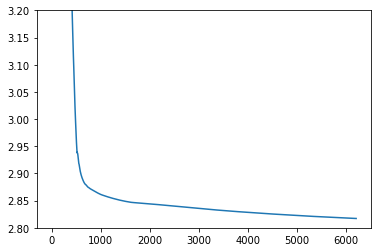

In [10]:
plt.plot(history['model_number'], history['CE_companion_position_m'])

plt.ylim(2.8, 3.2)

plt.show()

### Plot profiles

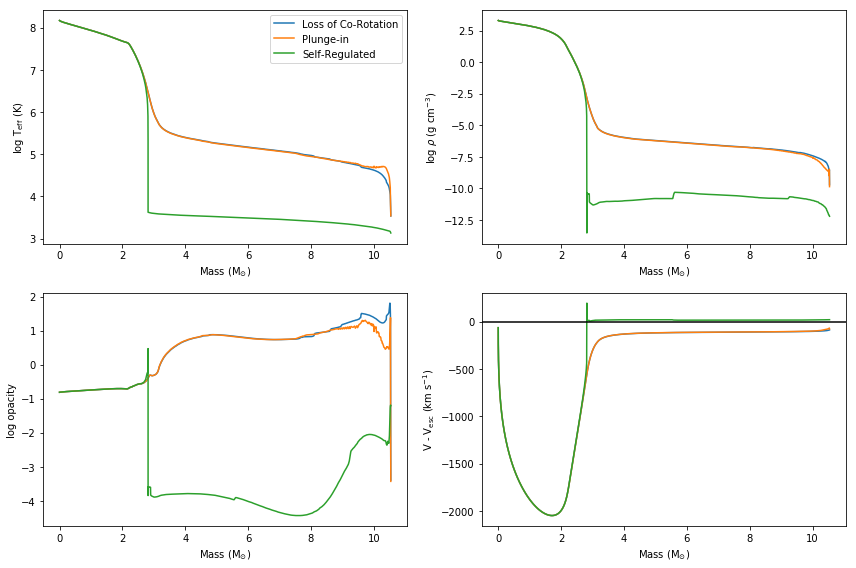

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))


# Temperature
ax[0,0].plot(phaseI['mass'], phaseI['logT'], label='Loss of Co-Rotation')
ax[0,0].plot(phaseII['mass'], phaseII['logT'], label='Plunge-in')
ax[0,0].plot(phaseIII['mass'], phaseIII['logT'], label='Self-Regulated')

ax[0,0].legend()

ax[0,0].set_xlabel(r'Mass (M$_{\odot}$)')
ax[0,0].set_ylabel(r'log T$_{\rm eff}$ (K)')



# Density
ax[0,1].plot(phaseI['mass'], phaseI['logRho'], label='Loss of Co-Rotation')
ax[0,1].plot(phaseII['mass'], phaseII['logRho'], label='Plunge-in')
ax[0,1].plot(phaseIII['mass'], phaseIII['logRho'], label='Self-Regulated')

ax[0,1].set_xlabel(r'Mass (M$_{\odot}$)')
ax[0,1].set_ylabel(r'log $\rho$ (g cm$^{-3}$)')


# Opacity
ax[1,0].plot(phaseI['mass'], np.log10(phaseI['opacity']), label='Loss of Co-Rotation')
ax[1,0].plot(phaseII['mass'], np.log10(phaseII['opacity']), label='Plunge-in')
ax[1,0].plot(phaseIII['mass'], np.log10(phaseIII['opacity']), label='Self-Regulated')

ax[1,0].set_xlabel(r'Mass (M$_{\odot}$)')
ax[1,0].set_ylabel(r'log opacity')



# Velocity
v_esc = np.sqrt(2.0* Gconst * phaseI['mass']*Msun / (10**phaseI['logR']*Rsun))
ax[1,1].plot(phaseI['mass'], (phaseI['velocity']-v_esc)/1.0e5, label='Loss of Co-Rotation')
v_esc = np.sqrt(2.0* Gconst * phaseII['mass']*Msun / (10**phaseII['logR']*Rsun))
ax[1,1].plot(phaseII['mass'], (phaseII['velocity']-v_esc)/1.0e5, label='Plunge-in')
v_esc = np.sqrt(2.0* Gconst * phaseIII['mass']*Msun / (10**phaseIII['logR']*Rsun))
ax[1,1].plot(phaseIII['mass'], (phaseIII['velocity']-v_esc)/1.0e5, label='Self-Regulated')
# ax[1,1].plot(phaseI['mass'], np.log10(phaseI['velocity']), label='Loss of Co-Rotation')
# ax[1,1].plot(phaseII['mass'], np.log10(phaseII['velocity']), label='Plunge-in')
# ax[1,1].plot(phaseIII['mass'], np.log10(phaseIII['velocity']), label='Self-Regulated')

ax[1,1].set_xlabel(r'Mass (M$_{\odot}$)')
ax[1,1].set_ylabel(r'V - V$_{\rm esc}$ (km s$^{-1}$)')

ax[1,1].axhline(0.0, color='k')





plt.tight_layout()
plt.show()

### Photon diffusion time

$$ t_{\gamma} = 3 \int_r^R {\rm d}r' \frac{\Delta \tau \Delta r}{c} $$

In [4]:
def calc_photon_diffusion_time(star):

    tau = np.append(0.0, 10**star['logtau'])
    delta_tau = tau[1:] - tau[:-1]

    radius = np.append(10**star['logR']*Rsun, 0.0)
    delta_r = radius[:-1] - radius[1:]
    
    t_diffuse = delta_tau * delta_r / clight
    
    return np.cumsum(t_diffuse)

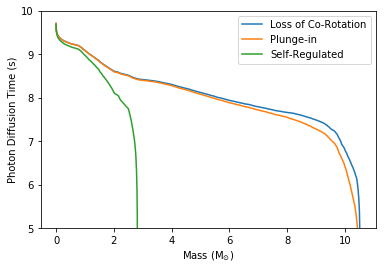

In [122]:
t_diffuse = calc_photon_diffusion_time(phaseI)
plt.plot(phaseI['mass'], np.log10(t_diffuse), label='Loss of Co-Rotation')

t_diffuse = calc_photon_diffusion_time(phaseII)
plt.plot(phaseII['mass'], np.log10(t_diffuse), label='Plunge-in')

t_diffuse = calc_photon_diffusion_time(phaseIII)
plt.plot(phaseIII['mass'], np.log10(t_diffuse), label='Self-Regulated')

plt.ylim(5.0, 10.0)

plt.legend()

plt.xlabel(r'Mass (M$_{\odot}$)')
plt.ylabel(r'Photon Diffusion Time (s)')


plt.show()

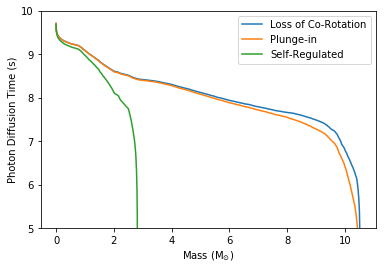

In [14]:
t_diffuse = calc_photon_diffusion_time(phaseI)
plt.plot(phaseI['mass'], np.log10(t_diffuse), label='Loss of Co-Rotation')

t_diffuse = calc_photon_diffusion_time(phaseII)
plt.plot(phaseII['mass'], np.log10(t_diffuse), label='Plunge-in')

t_diffuse = calc_photon_diffusion_time(phaseIII)
plt.plot(phaseIII['mass'], np.log10(t_diffuse), label='Self-Regulated')

plt.ylim(5.0, 10.0)

plt.legend()

plt.xlabel(r'Mass (M$_{\odot}$)')
plt.ylabel(r'Photon Diffusion Time (s)')


plt.show()

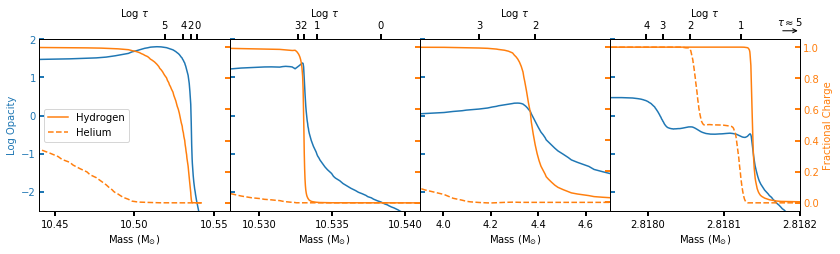

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5))

ax2_0 = ax[0].twinx()
ax2_1 = ax[1].twinx()
ax2_2 = ax[2].twinx()
ax2_3 = ax[3].twinx()

ax4_0 = ax[0].twiny()
ax4_1 = ax[1].twiny()
ax4_2 = ax[2].twiny()
ax4_3 = ax[3].twiny()

# ax3_0 = ax[0].twinx()
# ax3_1 = ax[1].twinx()
# ax3_2 = ax[2].twinx()
# ax3_3 = ax[3].twinx()

ax[0].plot(phaseI['mass'], np.log10(phaseI['opacity']), color='C0')
ax2_0.plot(phaseI['mass'], phaseI['avg_charge_H'], color='C1', label='Hydrogen')
ax2_0.plot(phaseI['mass'], phaseI['avg_charge_He']/2., color='C1', linestyle='dashed', label='Helium')
# ax3_0.plot(phaseI['mass'], 10**phaseI['logtau'], color='C2')

ax[1].plot(phaseII['mass'], np.log10(phaseII['opacity']), color='C0')
ax2_1.plot(phaseII['mass'], phaseII['avg_charge_H'], color='C1')
ax2_1.plot(phaseII['mass'], phaseII['avg_charge_He']/2., color='C1', linestyle='dashed')
# ax3_1.plot(phaseII['mass'], 10**phaseII['logtau'], color='C2')

ax[2].plot(phaseIII['mass'], np.log10(phaseIII['opacity']), color='C0')
ax2_2.plot(phaseIII['mass'], phaseIII['avg_charge_H'], color='C1')
ax2_2.plot(phaseIII['mass'], phaseIII['avg_charge_He']/2., color='C1', linestyle='dashed')
# ax3_2.plot(phaseIII['mass'], 10**phaseIII['logtau'], color='C2')

ax[3].plot(phaseIV['mass'], np.log10(phaseIV['opacity']), color='C0')
ax2_3.plot(phaseIV['mass'], phaseIV['avg_charge_H'], color='C1')
ax2_3.plot(phaseIV['mass'], phaseIV['avg_charge_He']/2., color='C1', linestyle='dashed')
# ax3_3.plot(phaseIV['mass'], 10**phaseIV['logtau'], color='C2')


axes = [ax2_0, ax2_1, ax2_2, ax2_3]
# axes3 = [ax3_0, ax3_1, ax3_2, ax3_3]
for i in range(4):
    ax[i].tick_params(axis='y', colors='C0', direction='in', width=2, length=5)
    ax[i].tick_params(axis='x', colors='k', width=2, length=5)
    axes[i].tick_params(axis='y', colors='C1', direction='in', width=2, length=5)
#     axes3[i].tick_params(axis='y', colors='C2')

# ax3_3.tick_params(axis='y', colors='C2')

ax2_0.legend()
    

# ax[0].set_title('Loss of Co-Rotation')
# ax[1].set_title('Plunge-in')
# ax[2].set_title('Self-Regulated')


ax[0].set_xlim(10.44, 10.56)
ax[1].set_xlim(10.528, 10.541)
ax[2].set_xlim(3.9, 4.7)
ax[3].set_xlim(2.81795, 2.8182)




for a in ax:
    a.set_ylim(-2.5, 2.0)
    a.set_xlabel(r'Mass (M$_{\odot}$)')

ax[0].set_ylabel(r'Log Opacity', color='C0')

ax2_3.set_ylabel(r'Fractional Charge', color='C1')  

for a in [ax2_0, ax2_1, ax2_2]:
    a.set_yticklabels([])
for a in [ax[1], ax[2], ax[3]]:
    a.set_yticklabels([])
    
    #     a.set_ylabel(r'Fractional Charge', color='C1')
#     a.set_ylabel(r'Average Hydrogen Charge', color='C1')

# for a in [ax3_0, ax3_1, ax3_2]:
#     a.set_ylabel(r'Optical Depth', color='C2')

fig.subplots_adjust(wspace=0)


ax_opacity = [ax4_0, ax4_1, ax4_2, ax4_3]
data_opacity = [phaseI, phaseII, phaseIII, phaseIV]
for i in range(4):
    a = ax_opacity[i]
    x_min, x_max = ax[i].get_xlim()
    
    
    def get_frac_x(log_tau):
        idx = np.argmin(np.abs(data_opacity[i]['logtau']-log_tau))        
        mass = data_opacity[i]['mass'][idx]
        width = (mass-x_min) / (x_max-x_min)
        return width
        
#     idx_min = np.argmin(np.abs(data_opacity[i]['mass']-x_min))
#     idx_max = np.argmin(np.abs(data_opacity[i]['mass']-x_max))
#     log_tau_min = data_opacity[i]['logtau'][idx_min]
#     log_tau_max = data_opacity[i]['logtau'][idx_max]
    
#     log_tau_min = np.floor(log_tau_min)
#     log_tau_max = np.ceil(log_tau_max)
#     log_tau_max = np.max([log_tau_max, 0.0])
#     log_tau_width = int(log_tau_min-log_tau_max)
#     tick_labels = np.linspace(log_tau_min, log_tau_max, log_tau_width+1.0)
    

    
    if i == 0:
        tick_labels = np.array([0, 2, 4, 5])
    elif i == 1:
        tick_labels = np.array([0, 1, 2, 3])
    elif i == 2:
        tick_labels = np.array([1, 2, 3, 4, 5])
    else:
        tick_labels = np.array([1, 2, 3, 4, 5])
        
    ticks = np.zeros(len(tick_labels))
    for j in range(len(tick_labels)):
        ticks[j] = get_frac_x(tick_labels[j])

    ax_opacity[i].set_xticks(ticks)
    ax_opacity[i].set_xticklabels(tick_labels)
    ax_opacity[i].tick_params(axis='x', colors='k', width=2, length=5)
    
# ax3_2.spines["right"].set_position(("axes", 1.3))

for a in ax_opacity:
    a.set_xlim(0, 1)
    a.set_xlabel(r'Log $\tau$')

ax4_3.text(0.88, 2.35, r'$\tau\approx$5')
ax4_3.annotate('', xy=(0.9, 1.05), xycoords='axes fraction', xytext=(1, 1.05), arrowprops=dict(arrowstyle="<-", color='k'))
# ax4_2.arrow(0.9, 0.5, 0.1, 0.0, **{"head_length":0.1, "head_width":0.2, "color":"k"})


# ax3_0.set_ylim(1.0e-5, 1.0e6)
# ax3_1.set_ylim(1.0e-5, 2.0e1)
# ax3_2.set_ylim(1.0e-5, 4.0e1)


    
    
plt.subplots_adjust(left=0.06, right=0.94, bottom=0.16, top=0.84)
    
    
ax[0].set_xticks([10.45, 10.5, 10.55])
ax[1].set_xticks([10.53, 10.535, 10.54])
ax[3].set_xticks([2.8180, 2.8181, 2.8182])
ax[3].set_xticklabels(["2.8180", "2.8181", "2.8182"])


# plt.tight_layout()
plt.savefig("../figures/recombination_front.pdf")
# plt.show()

In [15]:
print(phaseI.dtype)

[('zone', '<f8'), ('logT', '<f8'), ('logRho', '<f8'), ('logP', '<f8'), ('logR', '<f8'), ('luminosity', '<f8'), ('conv_vel', '<f8'), ('conv_L_div_L', '<f8'), ('log_Lrad', '<f8'), ('eps_grav', '<f8'), ('logL', '<f8'), ('log_Ledd', '<f8'), ('log_L_div_Ledd', '<f8'), ('log_Lrad_div_Ledd', '<f8'), ('log_Lrad_div_L', '<f8'), ('velocity', '<f8'), ('entropy', '<f8'), ('csound', '<f8'), ('v_div_csound', '<f8'), ('total_energy', '<f8'), ('scale_height', '<f8'), ('dm', '<f8'), ('q', '<f8'), ('logtau', '<f8'), ('pgas', '<f8'), ('prad', '<f8'), ('energy', '<f8'), ('grada', '<f8'), ('log_thermal_time_to_surface', '<f8'), ('gamma1', '<f8'), ('gamma3', '<f8'), ('x_mass_fraction_H', '<f8'), ('y_mass_fraction_He', '<f8'), ('z_mass_fraction_metals', '<f8'), ('opacity', '<f8'), ('eps_nuc', '<f8'), ('extra_heat', '<f8'), ('log_tau_conv_yrs', '<f8'), ('grada_sub_gradT', '<f8'), ('gradr_sub_gradT', '<f8'), ('super_ad', '<f8'), ('conv_vel_div_csound', '<f8'), ('dr_dt', '<f8'), ('dv_dt', '<f8'), ('mass', '<f8'

### Now, let's discuss energy transport and generation

(2, 7)

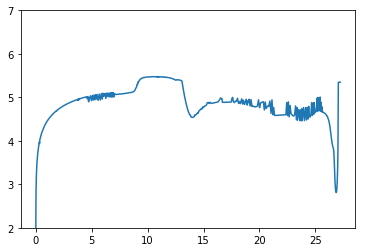

In [91]:
plt.plot(phaseI['mass'], phaseI['log_Lrad'])
plt.ylim(2, 7)

In [93]:
print(phaseI['log_Lrad'])

[  5.34940324   5.34940325   5.34940325 ... -99.          -0.15877504
   0.35583825]


In [123]:
def calc_transport_radiative(star):
    Lrad = np.append(10**star['log_Lrad'], 10**star['log_Lrad'][-1])
    delta_Lrad = Lrad[1:] - Lrad[:-1]
    return delta_Lrad * Lsun

def calc_transport_convective(star):
    L_conv = np.append(star['conv_L_div_L'] * 10**star['logL'], star['conv_L_div_L'][-1] * 10**star['logL'][-1])
    delta_L_conv = L_conv[:-1] - L_conv[1:]
    return delta_L_conv * Lsun

def calc_transport_PdV_work(star):
    pressure = np.append(0.0, star['pgas'])
    delta_pressure = pressure[1:] - pressure[:-1]
    L_work = 4.0*np.pi*(10**star['logR'] * Rsun)**2*delta_pressure*star['velocity']
    return L_work

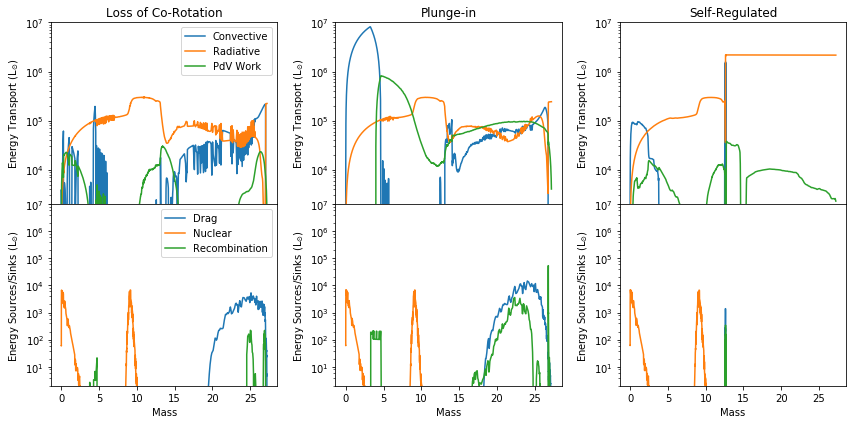

In [164]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

star = [phaseI, phaseII, phaseIII]
for i, a in enumerate(ax[0]):
    a.plot(star[i]['mass'], star[i]['conv_L_div_L']*10**star[i]['logL'], label='Convective')
    a.plot(star[i]['mass'], 10**star[i]['log_Lrad'], label='Radiative')
    L_work = 4.0*np.pi*(10**star[i]['logR'] * Rsun)**2*star[i]['pgas']*star[i]['velocity'] / Lsun
    a.plot(star[i]['mass'], L_work, label='PdV Work')

    a.set_yscale('log')
    a.set_ylim(2.0e3, 1.0e7)    
    a.set_ylabel(r'Energy Transport (L$_{\odot}$)')

    
for i, a in enumerate(ax[1]):
    a.set_xlabel('Mass')
    a.plot(star[i]['mass'], star[i]['extra_heat']*star[i]['dm']/Lsun, label='Drag')
    a.plot(star[i]['mass'], star[i]['eps_nuc']*star[i]['dm']/Lsun, label='Nuclear')
    a.plot(star[i]['mass'], star[i]['eps_recombination']*star[i]['dm']/Lsun, label='Recombination')
    
    #     a.plot(star[i]['mass'], star[i]['energy'], label='Internal')

    a.set_yscale('log')
    a.set_ylim(2.0e0, 1.0e7)    
    a.set_ylabel(r'Energy Sources/Sinks (L$_{\odot}$)')

    
    
    
ax[0,0].legend()
ax[1,0].legend()
    
ax[0,0].set_title('Loss of Co-Rotation')
ax[0,1].set_title('Plunge-in')
ax[0,2].set_title('Self-Regulated')


plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("../figures/inspiral_30M_8M_energy_transport.pdf")
# plt.show()